In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [ ]:
df['marital-status'].unique()

In [ ]:
df['education'].unique()

In [ ]:
df['workclass'].unique()

In [ ]:
df['race'].unique()

In [ ]:
df['native-country'].unique()

In [ ]:
df['income_>50K'].unique()

In [ ]:
total_people_income_based_on_race = df.groupby(['race']).sum(['income_>50K'])['income_>50K']
total_people_income_based_on_race

In [ ]:
total_people_income_based_on_education = df.groupby(['education']).sum(['income_>50K'])['income_>50K']
total_people_income_based_on_education

## Ploting hours of work per week and respective number of people with income >= 50K for ->

  > 1. data grouped over education level
  > 2. data grouped over occupation

Text(0.5, 0, 'Based on Occupation')

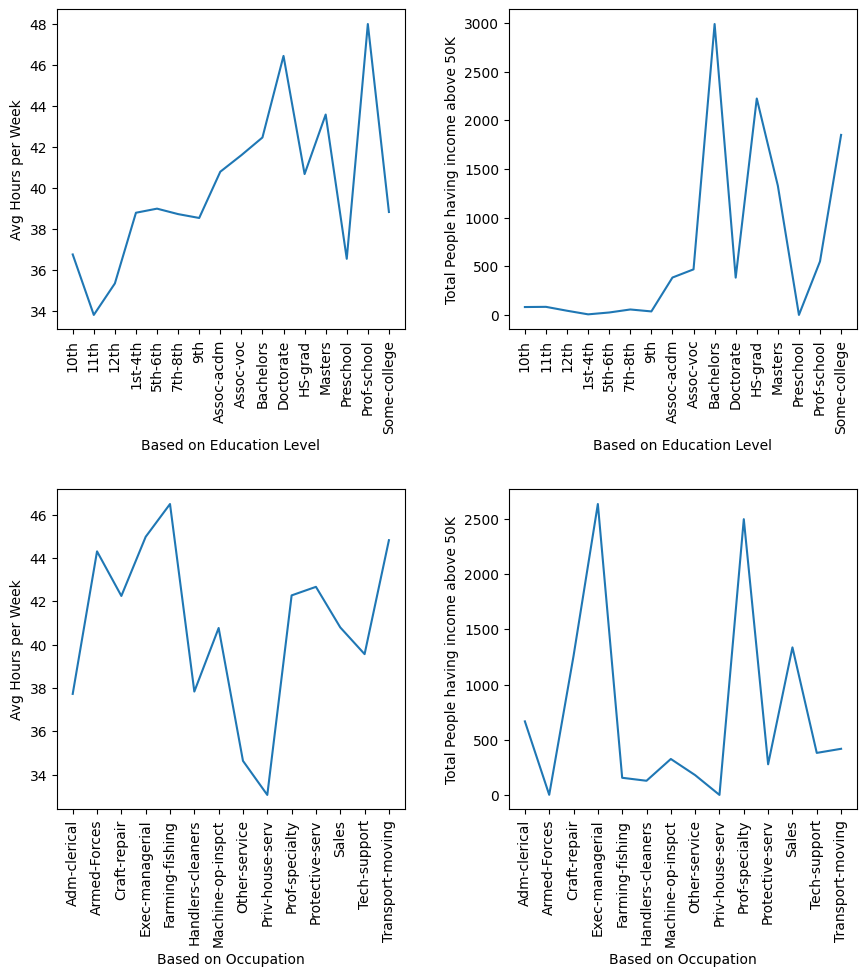

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=0.5,
                    wspace=0.3,
                    hspace=0.5)

plt.subplot(221)
hoursperweekedu = df.groupby(['education'])['hours-per-week'].mean()
hoursperweekedu.sort_values(ascending=False)
keys = hoursperweekedu.keys()
plt.plot(keys, hoursperweekedu, label=keys)
plt.xticks(rotation=90)
plt.ylabel('Avg Hours per Week')
plt.xlabel('Based on Education Level')

plt.subplot(222)
income_50_edu = df.groupby(['education'])['income_>50K'].sum()
income_50_edu.sort_values(ascending=False)
keys = income_50_edu.keys()
plt.plot(keys, income_50_edu, label=keys)
plt.xticks(rotation=90)
plt.ylabel('Total People having income above 50K')
plt.xlabel('Based on Education Level')

plt.subplot(223)
hoursperweekoccup = df.groupby(['occupation'])['hours-per-week'].mean()
hoursperweekoccup.sort_values(ascending=False)
keys = hoursperweekoccup.keys()
plt.plot(keys, hoursperweekoccup, label=keys)
plt.xticks(rotation=90)
plt.ylabel('Avg Hours per Week')
plt.xlabel('Based on Occupation')

plt.subplot(224)
income_50_occup = df.groupby(['occupation'])['income_>50K'].sum()
income_50_occup.sort_values(ascending=False)
keys = income_50_occup.keys()
plt.plot(keys, income_50_occup, label=keys)
plt.xticks(rotation=90)
plt.ylabel('Total People having income above 50K')
plt.xlabel('Based on Occupation')

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

education
10th             6.560000
11th             5.100182
12th             7.495741
1st-4th          3.139013
5th-6th          5.555556
7th-8th          6.612529
9th              5.409357
Assoc-acdm      26.606773
Assoc-voc       25.614418
Bachelors       41.404627
Doctorate       71.641791
HS-grad         15.665281
Masters         55.518395
Preschool        1.315789
Prof-school     73.663102
Some-college    18.896834
Name: income_>50K, dtype: float64


Text(0.5, 0, 'Based on Education Level')

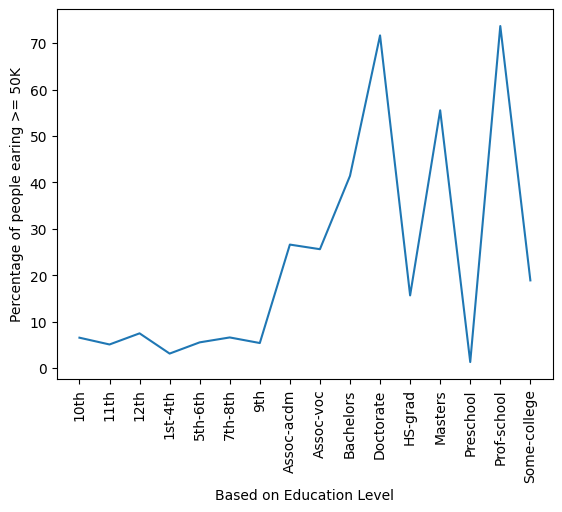

In [ ]:
total = df.groupby(['education']).count()['income_>50K']
lessthan = df.where(df['income_>50K']==0).groupby(['education']).count()['income_>50K']
morethan = df.where(df['income_>50K']==1).groupby(['education']).count()['income_>50K']
percentage_education_income_50K = (morethan / total) * 100
# percentage_education_income_50K = percentage_education_income_50K.map('{:.2f} %'.format)
# print(total, lessthan)
# print(morethan)
print(percentage_education_income_50K)
plt.plot(percentage_education_income_50K.keys(), percentage_education_income_50K, label=percentage_education_income_50K.keys())
plt.xticks(rotation=90)
plt.ylabel('Percentage of people earing >= 50K')
plt.xlabel('Based on Education Level')

In [ ]:
total = df.groupby(['occupation']).count()['income_>50K']
lessthan = df.where(df['income_>50K']==0).groupby(['occupation']).count()['income_>50K']
morethan = df.where(df['income_>50K']==1).groupby(['occupation']).count()['income_>50K']
percentage_occupation_income_50K = (morethan / total) * 100
percentage_occupation_income_50K = percentage_occupation_income_50K.map('{:.2f} %'.format)
# print(total, lessthan)
# print(morethan)
print(percentage_occupation_income_50K)

occupation
Adm-clerical         13.35 %
Armed-Forces         30.77 %
Craft-repair         22.81 %
Exec-managerial      47.82 %
Farming-fishing      11.72 %
Handlers-cleaners     6.98 %
Machine-op-inspct    12.10 %
Other-service         4.09 %
Priv-house-serv       1.33 %
Prof-specialty       45.23 %
Protective-serv      32.04 %
Sales                26.93 %
Tech-support         28.99 %
Transport-moving     19.80 %
Name: income_>50K, dtype: object


In [ ]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [ ]:
import seaborn as sns
import numpy as np

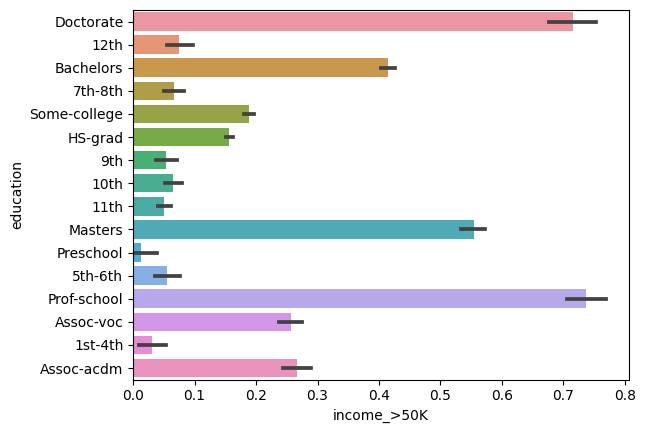

In [ ]:
ax=sns.barplot(x='income_>50K', y='education',
               data=df)

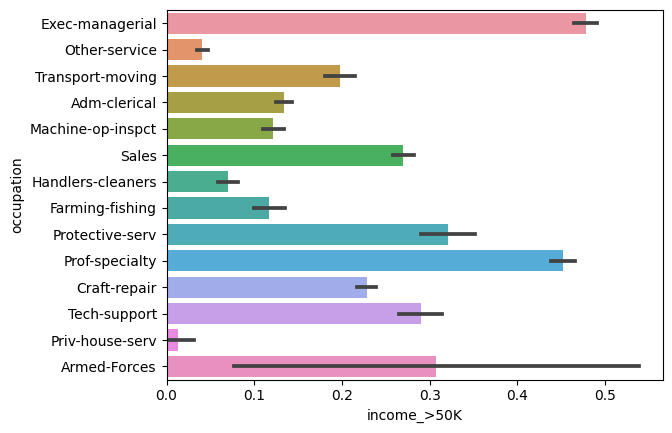

In [ ]:
ax=sns.barplot(x='income_>50K', y='occupation',
               data=df)

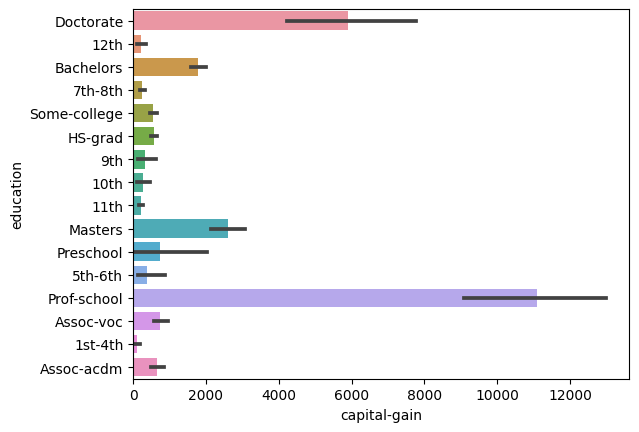

In [ ]:
ax=sns.barplot(x='capital-gain', y='education',
               data=df)

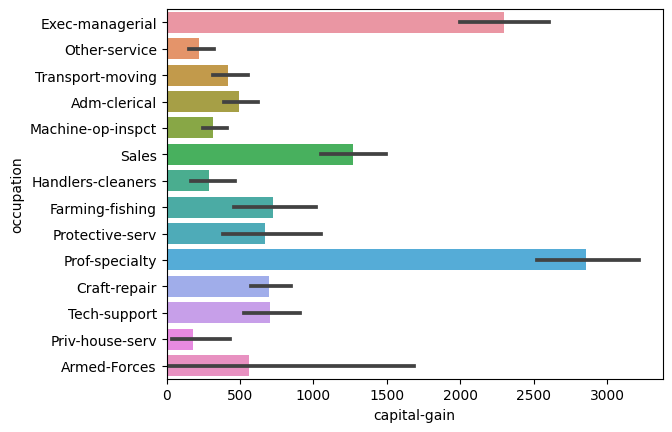

In [ ]:
ax=sns.barplot(x='capital-gain', y='occupation',
               data=df)

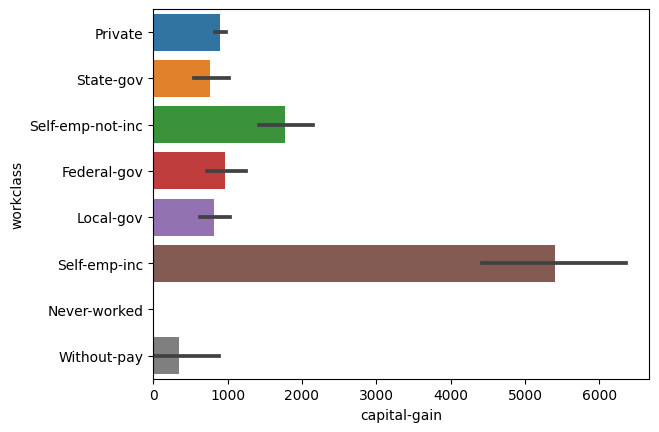

In [ ]:
ax=sns.barplot(x='capital-gain', y='workclass',
               data=df)

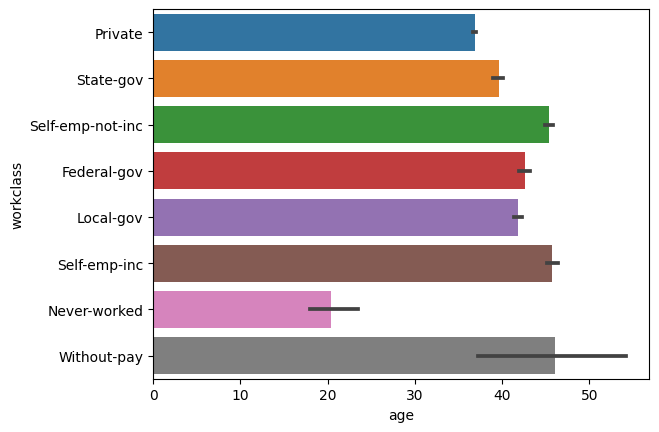

In [ ]:
ax=sns.barplot(x='age', y='workclass',
               data=df)

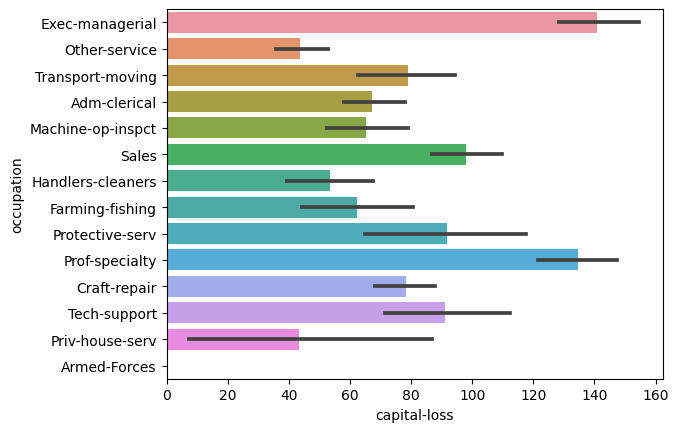

In [ ]:
ax=sns.barplot(x='capital-loss', y='occupation',
               data=df)

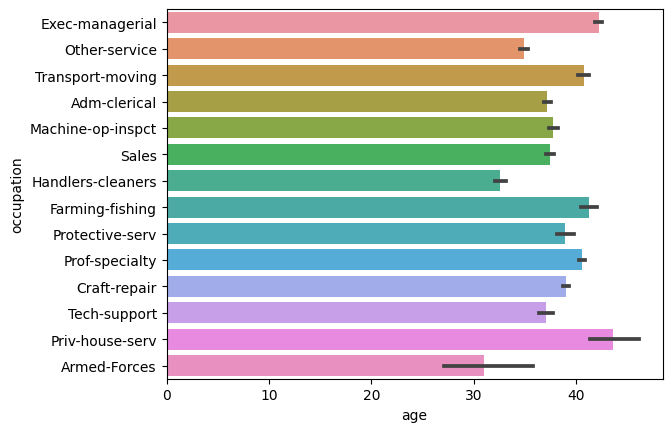

In [ ]:
ax=sns.barplot(x='age', y='occupation',
               data=df)

<Axes: >

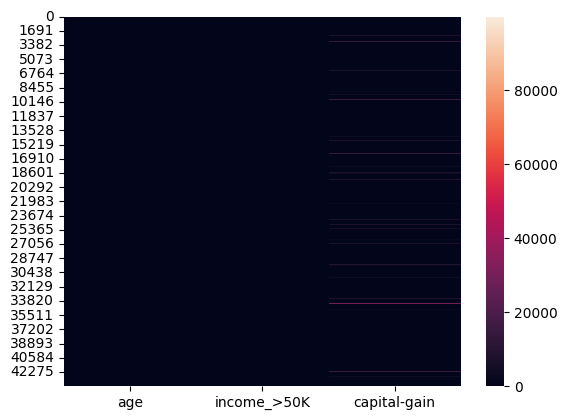

In [ ]:
sns.heatmap(df[['age', 'income_>50K', 'capital-gain' ]])

<Axes: xlabel='income_>50K', ylabel='age'>

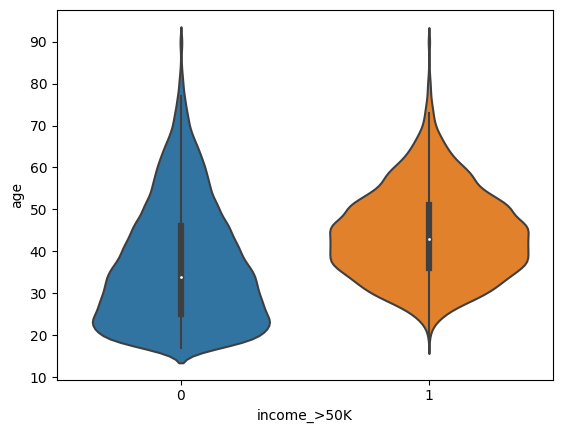

In [ ]:
sns.violinplot(data=df, x="income_>50K", y="age")

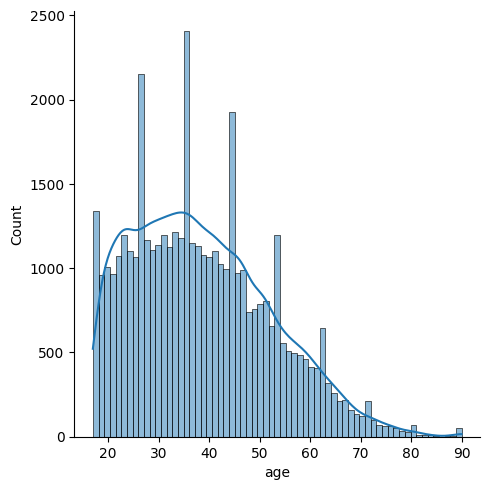

In [ ]:
sns.displot(data=df, x="age", kde=True)

In [ ]:
df_not_null = df.dropna()

In [ ]:
df_not_null.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

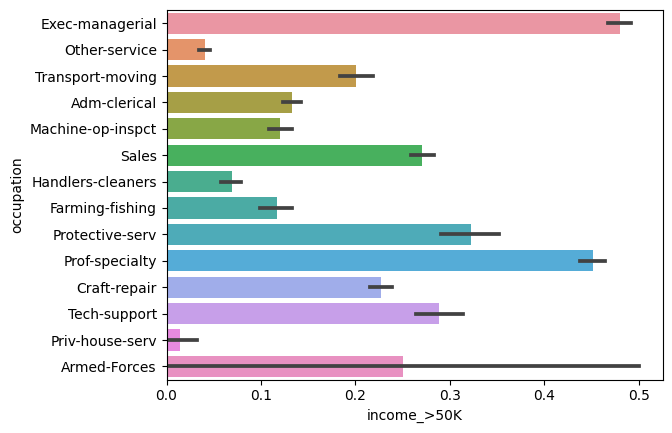

In [ ]:
ax=sns.barplot(x='income_>50K', y='occupation',
               data=df_not_null)

In [ ]:
df_heatmap = df_not_null.pivot_table(df_not_null, index='age', columns='occupation')
sns.heatmap(df_heatmap)

## Co-relation between hours per week of work(hpw) and if income is greator than 50K(income)

  - Here there is positive correlation between hpw and income meaning when we have higher hpw we have more probability that the income will be more than 50K

In [ ]:
corr_between_hpw_and_income = df['hours-per-week'].corr(df['income_>50K'])
corr_between_hpw_and_income

0.22791812170938403

In [ ]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing,

# Libraries for data visualization
import matplotlib.pyplot as pplt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy
import statsmodels.api as sm

In [ ]:
#load the dataset provided
df = pd.read_csv('/content/train.csv')

In [ ]:
# salary dataset info to find columns and count of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40260 entries, 0 to 40259
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40260 non-null  int64  
 1   workclass        37973 non-null  object 
 2   fnlwgt           40260 non-null  int64  
 3   education        40260 non-null  object 
 4   educational-num  40260 non-null  int64  
 5   marital-status   40260 non-null  object 
 6   occupation       37966 non-null  object 
 7   relationship     40260 non-null  object 
 8   race             40260 non-null  object 
 9   gender           40260 non-null  object 
 10  capital-gain     40260 non-null  int64  
 11  capital-loss     40260 non-null  int64  
 12  hours-per-week   40259 non-null  float64
 13  native-country   39568 non-null  object 
 14  income_>50K      40259 non-null  float64
dtypes: float64(2), int64(5), object(8)
memory usage: 4.6+ MB


In [ ]:
#replacing some special character columns names with proper names
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income_>50K'],
      dtype='object')

In [ ]:
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income_>50K        0
dtype: int64

In [ ]:
# code will replace the special character to nan and then drop the columns
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now
df.dropna(how='any',inplace=True)

In [ ]:
#running a loop of value_counts of each column to find out unique values.
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1054
33    1052
31    1045
35    1039
34    1032
      ... 
82       8
88       5
85       3
87       1
86       1
Name: age, Length: 73, dtype: int64
---- workclass ---
Private             27539
Self-emp-not-inc     3122
Local-gov            2560
State-gov            1571
Self-emp-inc         1339
Federal-gov          1163
Without-pay            16
Name: workclass, dtype: int64
---- fnlwgt ---
203488    18
126569    16
125892    16
111567    16
190290    14
          ..
69955      1
48549      1
203523     1
148626     1
102323     1
Name: fnlwgt, Length: 23568, dtype: int64
---- education ---
HS-grad         12235
Some-college     8162
Bachelors        6197
Masters          2074
Assoc-voc        1594
11th             1359
Assoc-acdm       1251
10th             1009
7th-8th           672
Prof-school       652
9th               563
12th              485
Doctorate         446
5th-6th           382
1st-4th           167
Preschool          62
Name: education, dtype: int

In [ ]:
#dropping based on uniquness of data from the dataset
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [ ]:
df['income'] = df['income_>50K']

In [ ]:
df = df.fillna(0)
#gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4,
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

<Axes: xlabel='education'>

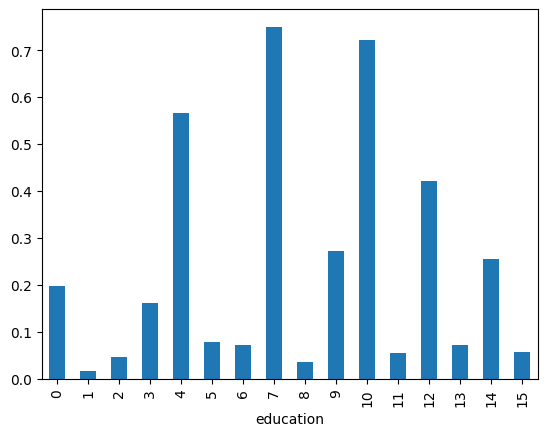

In [ ]:
#plotting a bar graph for Education against Income to see the co-relation between these columns
df.groupby('education').income.mean().plot(kind='bar')

<Axes: xlabel='occupation'>

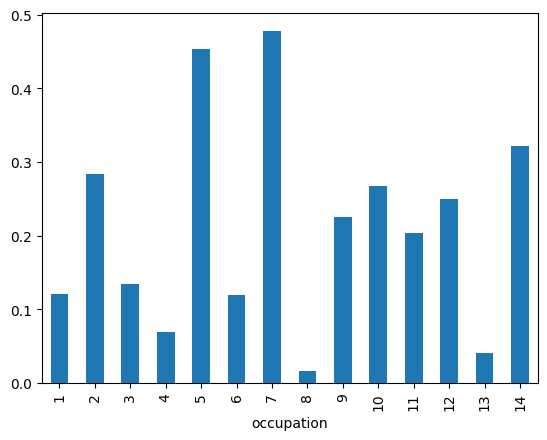

In [ ]:
df.groupby('occupation').income.mean().plot(kind='bar')

<Axes: xlabel='gender'>

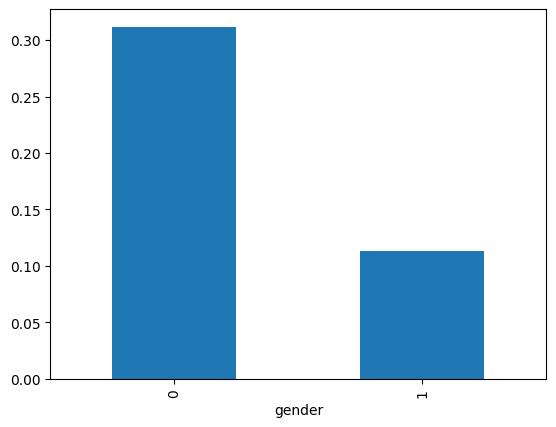

In [ ]:
df.groupby('gender').income.mean().plot(kind='bar')

<Axes: xlabel='race'>

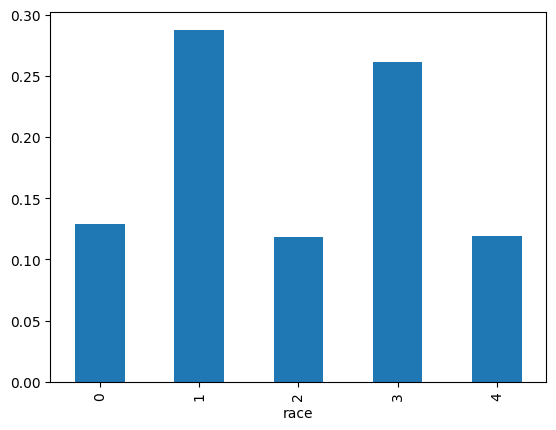

In [ ]:
df.groupby('race').income.mean().plot(kind='bar')

<Axes: xlabel='workclass'>

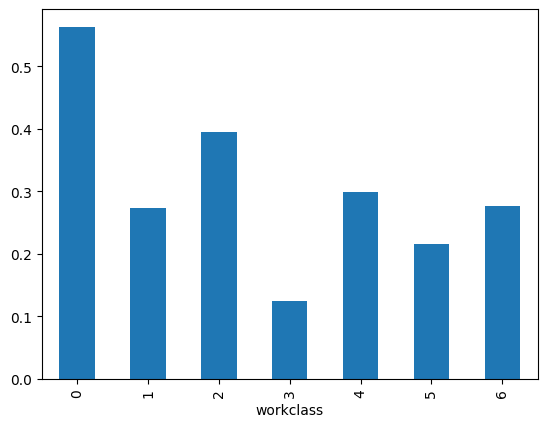

In [ ]:
df.groupby('workclass').income.mean().plot(kind='bar')

<Axes: xlabel='relationship'>

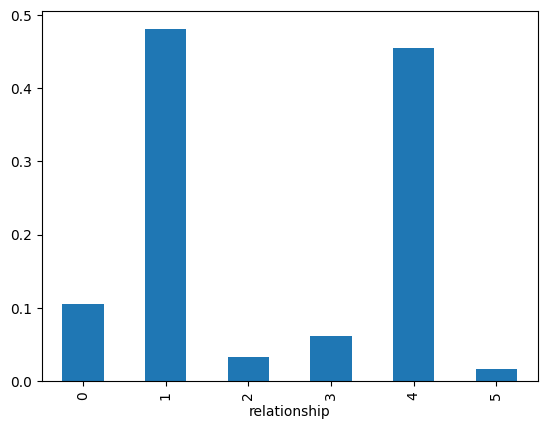

In [ ]:
df.groupby('relationship').income.mean().plot(kind='bar')

In [ ]:
#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.income)

In [ ]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#feeding the predict function with our test values in the format [['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [ ]:
#printing the accuracy values
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7549744172825469


In [ ]:
df = pd.read_csv('/content/test.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [ ]:
#replacing some special character columns names with proper names
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country'],
      dtype='object')

In [ ]:
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
dtype: int64

In [ ]:
# code will replace the special character to nan and then drop the columns
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now
df.dropna(how='any',inplace=True)

In [ ]:
#dropping based on uniquness of data from the dataset
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [ ]:
df = df.fillna(0)
#gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4,
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [ ]:
df.head()

,workclass,education,marital,occupation,relationship,race,gender
0,6,3,2,9,4,3,0
1,5,9,2,9,4,3,0
2,5,3,2,9,4,0,0
3,5,5,5,4,5,3,0
4,6,3,2,1,4,3,0


In [ ]:

df.columns


Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'gender'],
      dtype='object')

In [ ]:
df = df.iloc[:,[4, 1, 5, 3, 6, 2, 0]]

In [ ]:
df.columns

Index(['relationship', 'education', 'race', 'occupation', 'gender', 'marital',
       'workclass'],
      dtype='object')

In [ ]:
#feeding the predict function with our test values in the format [['relationship','education','race','occupation','gender','marital','workclass']]
predict = reg.predict(df)

In [ ]:
type(predict)

numpy.ndarray

In [ ]:
d = dict(enumerate(predict.flatten(), 1))

In [ ]:
d = dict([key, int(value)] for key, value in d.items())

In [ ]:
d

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 1,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 1,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 1,
 21: 0,
 22: 0,
 23: 0,
 24: 1,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 1,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 1,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 1,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 1,
 120: 0,
 121: 0,
 122: 0,
 123: 0,
 

In [ ]:
with open('/content/result.txt', 'w') as f:
  f.write('id, outcome\n')
  for key, value in d.items():
    f.write('%s, %s\n' % (key, value))